In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [ ]:
from google.colab import files

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print(f"Number of Rows: {df.shape[0]} \nNumber of Columns: {df.shape[1]}")
print("\n--- First 2 rows of data ---")
print(df.head(2))
print("\n--- Last 2 rows of data ---")
print(df.tail(2))
print("\n--- Dataset Info ---")
df.info()
print("\n--- Dataset Statistics ---")
print(df.describe())
print("\n--- Null Values in Data ---")
print(df.isnull().sum())


Saving data (1).csv to data (1).csv
Number of Rows: 4600 
Number of Columns: 18

--- First 2 rows of data ---
            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  5/2/2014 0:00   313000.0       3.0        1.5       1340.0    7912.0   
1  5/2/2014 0:00  2384000.0       5.0        2.5       3650.0    9050.0   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5         0.0   0.0          3      1340.0            0.0    1955.0   
1     2.0         0.0   4.0          5      3370.0          280.0    1921.0   

   yr_renovated                street       city  statezip country  
0          2005  18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0       709 W Blaine St    Seattle  WA 98119     USA  

--- Last 2 rows of data ---
                date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4598  7/10/2014 0:00  203400.0       4.0        2.0       2090.0    6630.0   
4599  7/10/2014 0:00  220600.0    

In [ ]:
# Drop the 'date' column if it exists
if 'date' in df.columns:
    df = df.drop('date', axis=1)
else:
    print("'date' column not found in the dataset.")

def fillNaObjMode(cols):
    for i in cols:
        if i in df.columns:
            df[i] = df[i].fillna(df[i].mode()[0])

def fillNaFloat(cols):
    for i in cols:
        if i in df.columns:
            df[i] = df[i].fillna(df[i].mean())

fillNaObjMode(['street', 'city', 'statezip', 'country'])
fillNaFloat(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'])

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

columns_to_convert = [
    'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'yr_built',
    'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'
]
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].astype('int64')

if 'street' in df.columns:
    df = df.drop('street', axis=1)
if 'country' in df.columns:
    df = df.drop('country', axis=1)

def dataEncoder(cols):
    for i in cols:
        if i in df.columns:
            dataLabelEncoder = LabelEncoder()
            df[i] = dataLabelEncoder.fit_transform(df[i])

dataEncoder(['city', 'statezip'])


'date' column not found in the dataset.


In [ ]:
# Split data into training and testing sets
trainData, testData = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

train_x = trainData.iloc[:, 1:]
train_y = trainData.iloc[:, 0]
test_x = testData.iloc[:, 1:]
test_y = testData.iloc[:, 0]

print(f"Training Data Shape: {train_x.shape}")
print(f"Testing Data Shape: {test_x.shape}")


Training Data Shape: (3680, 14)
Testing Data Shape: (920, 14)


In [ ]:
# Scale features for better SVM performance
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)


In [ ]:
# Train SVM model
model_svc = SVC()
model_svc.fit(train_x_scaled, train_y)

svm_predictions = model_svc.predict(test_x_scaled)
svm_accuracy = accuracy_score(test_y, svm_predictions)
print(f"\n-- SVM Model Accuracy: {round(svm_accuracy, 3)}")
print(f"\nConfusion Matrix:\n{confusion_matrix(test_y, svm_predictions)}")
print(f"\nClassification Report:\n{classification_report(test_y, svm_predictions)}")

pickle.dump(model_svc, open('model_svc.pkl', 'wb'))



-- SVM Model Accuracy: 0.01

Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.33      0.03         9
       83300       0.00      0.00      0.00         1
       87500       0.00      0.00      0.00         1
      100000       0.00      0.00      0.00         1
      120000       0.00      0.00      0.00         1
      139000       0.00      0.00      0.00         1
      140000       0.00      0.00      0.00         1
      141800       0.00      0.00      0.00         1
      148226       0.00      0.00      0.00         1
      148612       0.00      0.00      0.00         1
      150000       0.00      0.00      0.00         2
      160000       0.00      0.00      0.00         1
      160797       0.00      0.00      0.00         1
      168000       0.00      0.00      0.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_x, train_y)

rf_predictions = rf_model.predict(test_x)
rf_accuracy = accuracy_score(test_y, rf_predictions)
print(f"\n-- Random Forest Model Accuracy: {round(rf_accuracy, 3)}")
print(f"\nConfusion Matrix:\n{confusion_matrix(test_y, rf_predictions)}")
print(f"\nClassification Report:\n{classification_report(test_y, rf_predictions)}")



-- Random Forest Model Accuracy: 0.011

Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.11      0.08         9
        7800       0.00      0.00      0.00         0
       83300       0.00      0.00      0.00         1
       84350       0.00      0.00      0.00         0
       87500       0.00      0.00      0.00         1
      100000       0.00      0.00      0.00         1
      102500       0.00      0.00      0.00         0
      120000       0.00      0.00      0.00         1
      127160       0.00      0.00      0.00         0
      132250       0.00      0.00      0.00         0
      139000       0.00      0.00      0.00         1
      140000       0.00      0.00      0.00         1
      141800       0.00      0.00      0.00         1
      148226       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
# Hyperparameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x_scaled, train_y)

best_model = grid_search.best_estimator_
grid_predictions = best_model.predict(test_x_scaled)
grid_accuracy = accuracy_score(test_y, grid_predictions)
print(f"\n-- Optimized SVM Model Accuracy: {round(grid_accuracy, 3)}")
print(f"Best Parameters: {grid_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



-- Optimized SVM Model Accuracy: 0.011
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}



-- Feature Importance --
          Feature  Importance
3        sqft_lot    0.146946
2     sqft_living    0.135356
8      sqft_above    0.132259
10       yr_built    0.126353
13       statezip    0.108312
12           city    0.069356
9   sqft_basement    0.065153
11   yr_renovated    0.064567
0        bedrooms    0.047013
7       condition    0.037909
1       bathrooms    0.029823
4          floors    0.018244
6            view    0.017310
5      waterfront    0.001399


<ipython-input-11-6e3edd84f4f2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


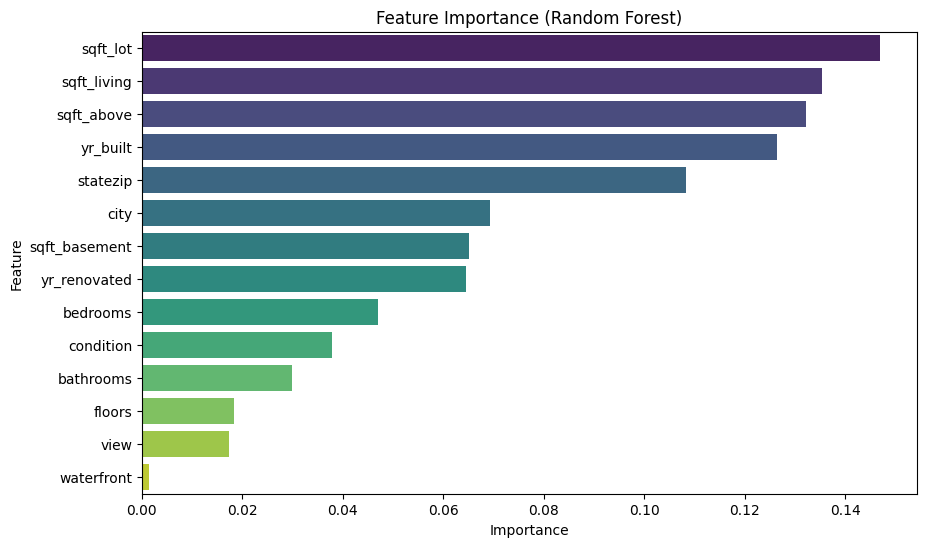

In [ ]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': train_x.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\n-- Feature Importance --")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()
